# Anime Image Enhancer
### Using a Convolutional Neural Network

So I ripped this anime picture dataset from this weeb on github. Then to make the algorithm I zero-padded the image to be 256x256 for each image (the maximum height and length these images were set as). I then made input data by adding a blur to the photos, in order to learn their unblurred counterparts.

Very interesting and decent results so far, although the algo is quite basic for now...

In [1]:
% matplotlib inline
from PIL import Image
import re
import numpy as np
import os
from scipy.ndimage.filters import gaussian_filter
from matplotlib import pyplot


In [2]:
def input_creator(img):
    ''' takes input picture and adds some noise to it '''
    ima = 1*img
    for i in range(len(img)):
        ima[i] = gaussian_filter(img[i],sigma = 1.5)
        
    return(ima)

In [3]:
def image_padder(img):
    ''' image must be less than 256 w or 256 height'''
    pad = np.zeros((256,256,img.shape[2]))
    
    pad[:img.shape[0] ,:img.shape[1] ,:] = img
    
    return pad


In [6]:
import numpy as np

directory = '/home/max/Downloads/cc-anime-images-master/images'
count = 0
for filename in os.listdir(directory):
    if filename.endswith(".jpg"): 
        img = image_padder(np.array(Image.open(os.path.join(directory, filename)) ) )[:,:,0]
        
        if count == 0:
            # first time - initialize the arrays...
            
            inputs = np.reshape(  input_creator(img), (1,256,256,1) )
            targets = np.reshape( img, (1,256,256,1) )
            
            count +=1
        else:
            # there has been more times... - append the arrays
            
            inputs = np.concatenate( (inputs , np.reshape( input_creator(img) ,(1,256,256,1) )), axis=0)
            
            targets =  np.concatenate( (targets , np.reshape(img,(1,256,256,1) )), axis=0)
            
        
        continue
    else:
        continue

In [7]:
print(inputs.shape == targets.shape)
print(inputs.shape)

# good the shapes are correct

True
(99, 256, 256, 1)


Now we can train a conv net that will hopefully learn how the image should look

In [8]:
from keras.models import Model, Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers import Dense, Activation, MaxPooling2D, Flatten, Dropout
from keras.callbacks import History 
history = History()

Using TensorFlow backend.


In [10]:
# now make the conv net...
model = Sequential()
model.add(Convolution2D(50, 5, 5, border_mode='same', activation = 'relu',input_shape=( 256, 256,1)))
model.add(Convolution2D(50, 4, 4,activation = 'relu', border_mode='same'))
model.add(Convolution2D(1, 3, 3,activation = 'relu', border_mode='same'))
model.compile(optimizer = 'rmsprop', loss = 'mse')


Train the model now

In [86]:
model.fit(x= inputs, y = targets, nb_epoch = 1, batch_size = 1,callbacks=[history])

Epoch 1/1
99/99 [==============================] - 51s - loss: 445.5311    


In [118]:
pred = model.predict(inputs)

In [143]:
''' choose picture idx to show below... '''
pic = 25
# 3 is good

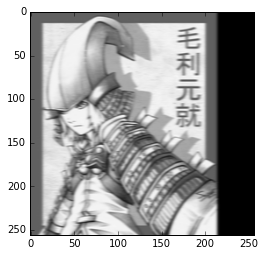

In [144]:
''' Input (noisy picture) '''
pyplot.imshow(np.reshape(inputs[pic],(256,256)), pyplot.cm.gray)
pyplot.show()

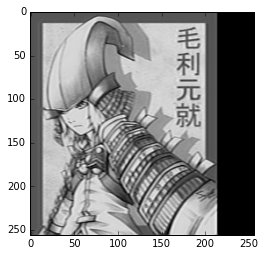

In [145]:
''' view these predictions... '''
pyplot.imshow(np.reshape(pred[pic],(256,256)), pyplot.cm.gray)
pyplot.show()

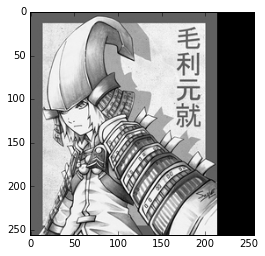

In [146]:
''' TRUE '''
pyplot.imshow(np.reshape(targets[pic],(256,256)), pyplot.cm.gray)
pyplot.show()

Another pic just because we can

In [195]:
pic = 42

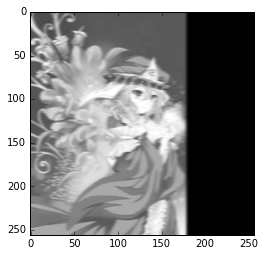

In [196]:
''' Input (noisy picture) '''
pyplot.imshow(np.reshape(inputs[pic],(256,256)), pyplot.cm.gray)
pyplot.show()

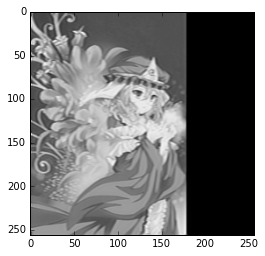

In [197]:
''' view these predictions... '''
pyplot.imshow(np.reshape(pred[pic],(256,256)), pyplot.cm.gray)
pyplot.show()

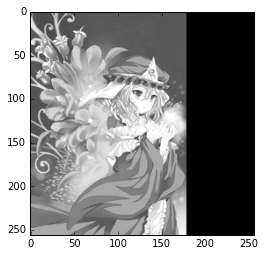

In [198]:
''' TRUE '''
pyplot.imshow(np.reshape(targets[pic],(256,256)), pyplot.cm.gray)
pyplot.show()

Anuther one... (MAJOR KEY)

In [199]:
pic = 3

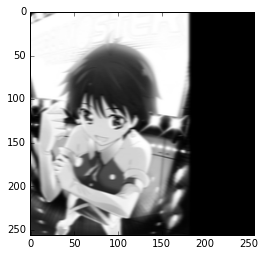

In [200]:
''' Input (noisy picture) '''
pyplot.imshow(np.reshape(inputs[pic],(256,256)), pyplot.cm.gray)
pyplot.show()

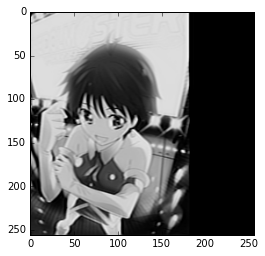

In [201]:
''' view these predictions... '''
pyplot.imshow(np.reshape(pred[pic],(256,256)), pyplot.cm.gray)
pyplot.show()

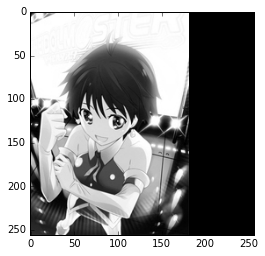

In [202]:
''' TRUE '''
pyplot.imshow(np.reshape(targets[pic],(256,256)), pyplot.cm.gray)
pyplot.show()

Clearly the pics start shining from this algorithm, although it surely needs more training still as it takes ages to train and I haven't done much of it yet. Looking promising!